In [1]:
import os
import pandas as pd
import datetime as dt
import imageio
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
#from keras.models import Sequential, Model

#Basics
#from __future__ import division

#Stats
#import mne
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLMParams
#import preBert
from statsmodels.stats.weightstats import DescrStatsW

import mystats 


import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from scipy import stats
import warnings
from scipy.stats.mstats import zscore
#matplotlib.use('TkAgg')  
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hac
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import cross_val_score
#import mne
#import pyvttbl as pt

import mycharite
import mystats 

In [2]:
VIT=mycharite.load_VIT_actress_AU()
df, df_audio, action_r, action_c, gaze, audio =mycharite.load('charite')
mimicry, new_features=mycharite.calc_mim(df, VIT)
df=pd.merge(df, mimicry, on='vpn')

df=mycharite.aq_charite(df)
df=mycharite.ados_charite(df)
df=mycharite.adapt_times(df)

AU06_r
AU12_r
AU06_c


C:\Users\User\Anaconda2\envs\py3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\User\Anaconda2\envs\py3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\User\Anaconda2\envs\py3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\User\Anaconda2\envs\py3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\User\Anaconda2\envs\py3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


AU12_c
AU15_r
AU09_r
AU04_r
AU15_c
AU09_c
AU04_c
gaze_angle_x
gaze_angle_y
Proband 53 ist korrekt als NT gelabelt
Proband 75 ist falsch als NT gelabelt


In [3]:
experts=mycharite.load_experts(df)

53 Kontrollprobandin
75 - 7 ist Autist (prüfen, ob tatsächlich 7 und 75 übereinstimmen)

In [4]:
experts[['vpn', 'asc','rater', 'ASC', 'Pseudo', 'Value', 'asq', 'ados_social']][experts.rater=='Beatrix'].sort_values('Pseudo')#.head()

,vpn,asc,rater,ASC,Pseudo,Value,asq,ados_social
30,33,1.0,Beatrix,0,1,0.24,41.0,9.0
72,77,0.0,Beatrix,1,2,8.07,19.0,-97.0
32,35,0.0,Beatrix,0,3,0.48,6.0,-97.0
75,80,0.0,Beatrix,1,4,6.75,7.0,-97.0
27,30,1.0,Beatrix,1,5,9.52,33.0,9.0
55,60,0.0,Beatrix,0,6,0.84,14.0,-97.0
44,48,0.0,Beatrix,0,7,0.60,9.0,-97.0
50,55,0.0,Beatrix,0,8,1.45,7.0,-97.0
53,58,0.0,Beatrix,1,9,8.80,19.0,-97.0
22,25,1.0,Beatrix,1,10,9.40,43.0,8.0


In [5]:
experts.columns

Index(['vpn', 'Pseudo', 'Prerating', 'Scaling', 'ASC', 'Value', 'rater',
       'experience_month_total', 'experience_month_diagnostic',
       'experience_diagnosis_cases', 'experience_ados', 'asc', 'asq', 'asd',
       'sex', 'age', 'main_diagnosis', 'ados_commu', 'ados_social',
       'ados_total', 'adir_social', 'adir_commu', 'adir_behav', 'adir_onset',
       'correct', 'false', 'false_positive', 'false_negative',
       'true_negatives', 'true_positives'],
      dtype='object')

In [6]:
experts.groupby('rater').mean()[['correct', 'false', 'false_positive','false_negative', 'true_negatives', 'true_positives']]

,correct,false,false_positive,false_negative,true_negatives,true_positives
rater,,,,,,
Beatrix,0.600000,0.400000,0.3,0.100000,0.400000,0.2
Charlotte,0.800000,0.200000,0.0,0.200000,0.600000,0.2
Heiko,0.700000,0.300000,0.0,0.300000,0.300000,0.4
Isabel,1.000000,0.000000,0.0,0.000000,0.700000,0.3
Jenny,0.700000,0.300000,0.1,0.200000,0.400000,0.3
Simone,0.700000,0.300000,0.0,0.300000,0.400000,0.3
Stefan,0.700000,0.300000,0.2,0.100000,0.400000,0.3
Svenja,0.555556,0.444444,0.0,0.444444,0.555556,0.0


In [7]:
experts.sum()[['correct', 'false', 'false_positive','false_negative', 'true_negatives', 'true_positives']]

correct           57
false             22
false_positive     6
false_negative    16
true_negatives    37
true_positives    20
dtype: object

normally distributed: p1=0.1289704293012619 p2=0.6125357747077942
(0.7205491177014091, 0.04376217782902873)
None


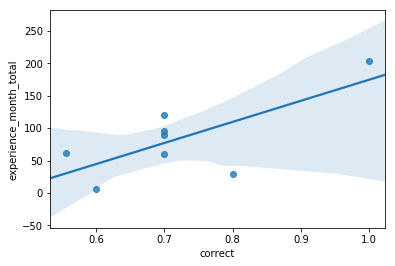

normally distributed: p1=0.1289704293012619 p2=0.44383588433265686
(0.6671340680563205, 0.07071747078537731)
None


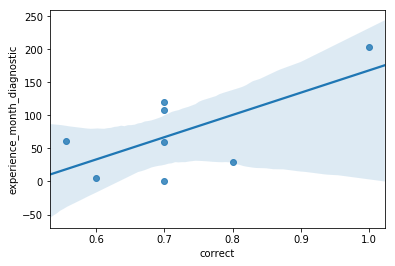

not normally distributed: p1=0.1289704293012619 p2=0.005131516605615616
SpearmanrResult(correlation=0.36782605983808475, pvalue=0.37000798833303294)
None


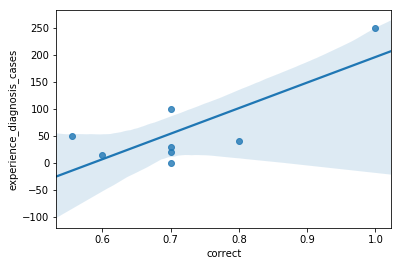

not normally distributed: p1=0.1289704293012619 p2=0.008020525798201561
SpearmanrResult(correlation=0.3126159830354724, pvalue=0.45091483191911663)
None


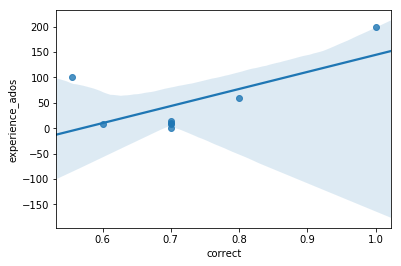

In [8]:
vpn_experts=experts.groupby('rater').mean()
vpn_experts=vpn_experts[(vpn_experts.experience_month_total>0)] 


experiences=['experience_month_total', 'experience_month_diagnostic',
       'experience_diagnosis_cases', 'experience_ados']
for experience in experiences:
    print (mystats.correlation(vpn_experts['correct'], vpn_experts[experience]))
    sns.regplot(vpn_experts['correct'], vpn_experts[experience])
    plt.show()

In [9]:
np.mean(experts.groupby('rater').mean()['correct'])

0.7194444444444444

In [10]:
experts[experts.sex==1].sum()[['correct', 'false', 'false_positive','false_negative', 'true_negatives', 'true_positives']]
#female
experts[experts.sex==2].sum()[['correct', 'false', 'false_positive','false_negative', 'true_negatives', 'true_positives']]
#male

#import numpy as np
from scipy.stats import chi2_contingency
#female vs. male
obs = np.array([[10, 5, 16, 19], [10,2, 20,7]])
chi2_contingency(obs)



(6.0007360445822,
 0.11157442041682951,
 3,
 array([[11.23595506,  3.93258427, 20.2247191 , 14.60674157],
        [ 8.76404494,  3.06741573, 15.7752809 , 11.39325843]]))

In [11]:

mystats.correlation(experts_ASC['Value'], experts_ASC['ados_social'])
mystats.correlation(experts_ASC['Value'], experts_ASC['ados_social'])
mystats.correlation(experts_AQ['Value'], experts_AQ['asq'])

for i in set(df2['rater']):
    df3=df2[df2.rater==i]
    print (i)
    print (np.sum(df3['asc']==df3['ASC'])/len(df3))

NameError: name 'experts_ASC' is not defined

## Graphiken

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

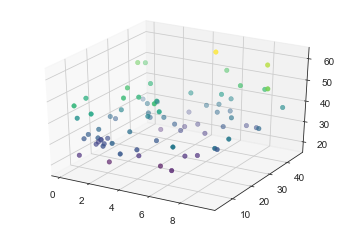

In [20]:
ax = plt.axes(projection='3d')
ax.scatter(experts['Value'], experts['asq'], experts['age'], c=experts['age'], cmap='viridis', linewidth=0.5);
plt.show()

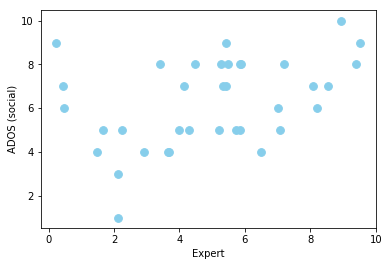

In [14]:
#Figure for ASC
experts_ASC=experts[experts['ados_social']>0].reset_index()
plt.scatter(experts_ASC['Value'], experts_ASC['ados_social'], c='skyblue', s=60)
plt.xlabel('Expert')
plt.ylabel('ADOS (social)')
plt.show()


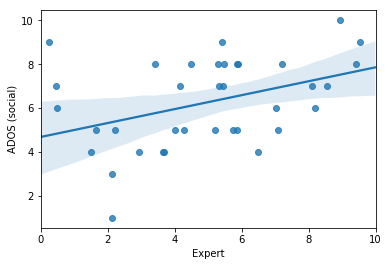

In [15]:

#Figure for ASC
experts_ASC=experts[experts['ados_social']>0].reset_index()
sns.regplot(experts_ASC['Value'], experts_ASC['ados_social'])
plt.xlabel('Expert')
plt.ylabel('ADOS (social)')
plt.xlim(0,10)
plt.show()


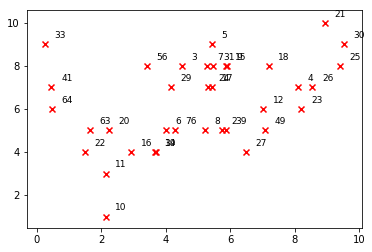

In [16]:
#mit labels
types =  experts_ASC['vpn'] #['apple', 'orange', 'apple', 'pear', 'apple', 'orange', 'apple', 'pear']
x_coords = experts_ASC['Value']# [10, 10, 5, 4, 3, 20, 19, 21]
y_coords = experts_ASC['ados_social']#[21, 23, 12, 21, 10, 20, 14, 2]

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, type, fontsize=9)
plt.show()

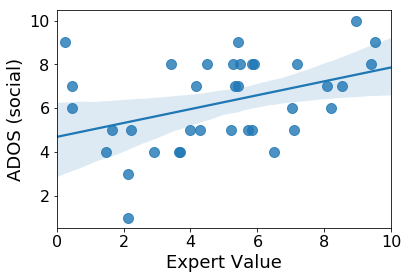

In [17]:
#Figure for ASC
experts_ASC=experts[experts['ados_social']>0].reset_index()
sns.regplot(experts_ASC['Value'], experts_ASC['ados_social'], scatter_kws={"s": 100},)
plt.yticks(fontsize=16)    
plt.xticks(fontsize=16)  
plt.xlabel('Expert Value', fontsize=18) 
plt.ylabel('ADOS (social)', fontsize=18)
plt.xlim(0,10)
plt.show()


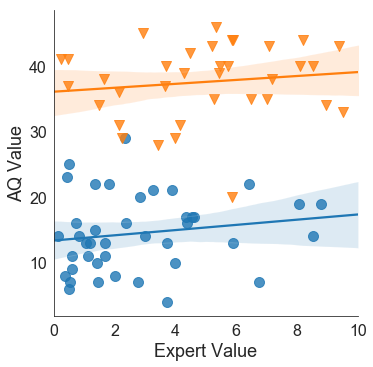

In [18]:
sns.set_style("white")
experts_AQ=experts[experts.asq>0]
sns.lmplot(x="Value", y="asq", data=experts_AQ, #fit_reg=False,
           hue='asc', legend=False,  scatter_kws={"s": 100},
           markers=["o", "v"] )
plt.yticks(fontsize=16)    
plt.xticks(fontsize=16)  
plt.xlabel('Expert Value', fontsize=18) 
plt.ylabel('AQ Value', fontsize=18)
#plt.legend(title='ASC', loc = "upper left", fontsize=16)
plt.xlim(0,10)
#plt.savefig('AU_'+ str(i) + '_.png')
plt.show()



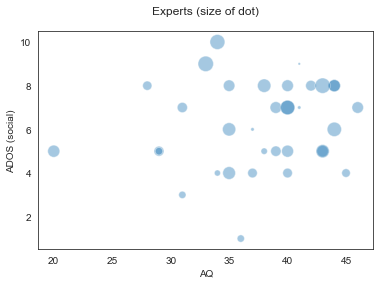

In [19]:
#3 Dimension

experts_ASC=experts[experts['ados_social']>0].reset_index()
plt.scatter(x = experts_ASC['asq'], 
            y = experts_ASC['ados_social'], 
            s = experts_ASC['Value']*25, # <== 😀 Look here!
            alpha=0.4,   edgecolors='w')

plt.xlabel('AQ')
plt.ylabel('ADOS (social)')
plt.title('Experts (size of dot)', y=1.05)

plt.show()

In [ ]:
df2